
¡Hola, Paula!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [94]:
# Cargar todas las librerías
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recomiendo cargar la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Cargar datos

In [95]:
# Carga los archivos de datos en diferentes DataFrames

calls = pd.read_csv("/datasets/megaline_calls.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")
users = pd.read_csv("/datasets/megaline_users.csv")


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [96]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print(plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [97]:
# Imprime una muestra de los datos para las tarifas
print(plans.sample())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

In [98]:
#No hay valores nulos, lo cual es una buena señal. Tenemos cifras en formato entero y del tipo float. Solo hay dos filas en la muestra, lo cual podría ser insuficiente, por lo que sería bueno mostrar más.También habría que homologar los gb y mb para evitar inconsistencias. Los nombres de las columnas están bien.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [99]:
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024
plans.drop(columns='mb_per_month_included', inplace=True)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Es correcto considerar que 1024 megabytes son 1 gigabytes.
    
</div>

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [100]:
#Estandarizar cuantos mensajes, gigabytes y minutos se obtienen por cada dolar pagado.
plans['gb_per_dollar'] = plans['gb_per_month_included'] / plans['usd_monthly_pay']
plans['minutes_per_dollar'] = plans['minutes_included'] / plans['usd_monthly_pay']
plans['messages_per_dollar'] = plans['messages_included'] / plans['usd_monthly_pay']


## Usuarios/as

In [101]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(users.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [102]:
# Imprime una muestra de datos para usuarios
print(users.sample())


     user_id first_name last_name  age                  city    reg_date  \
191     1191       Zack    Waters   75  St. Louis, MO-IL MSA  2018-01-21   

         plan  churn_date  
191  ultimate  2018-11-30  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

In [103]:
#El tamaño de este dataframe es más grande que el de las tarifas, por lo que podemos analizar más datos. Hay 34 valores no nulos en la columna de la tasa de abandono, lo que nos dice que al menos 34 personas se dieron de baja. No hay columnas del tipo datetime a pesar de que se manejan fechas. Posiblemente podrían agruparse columnas como la de plan (como categoría) o la de la ciudad.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [104]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [105]:

users['tenure_days'] = (users['churn_date'].fillna(pd.Timestamp.today()) - users['reg_date']).dt.days #duración de la vida del cliente
users['is_active'] = users['churn_date'].isna() #verificamos si siguen siendo clientes o no



## Llamadas

In [106]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(calls.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [107]:
# Imprime una muestra de datos para las llamadas

print(calls.sample())

             id  user_id   call_date  duration
54478  1196_364     1196  2018-05-19      8.86


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

In [108]:
#No hay valores nulos. Al igual que con el dataframe de usuarios, el de llamadas contiene una columna date que tiene el tipo objetc, cuando debería de ser datetime, para poder filtrar por mes, semana, etc.Igualmente se debería de redondear la duración de la llamada. 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [109]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['rounded_minutes'] = calls['duration'].apply(np.ceil).astype(int)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo en redondear la duración de las llamadas.
    
</div>

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [110]:
#Se pueden agrupar los minutos por usuarios.
user_call_summary = (
    calls.groupby('user_id')['rounded_minutes']
    .sum()
    .reset_index()
    .rename(columns={'rounded_minutes': 'total_minutes_used'})
)


## Mensajes

In [111]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(messages.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [112]:
# Imprime una muestra de datos para los mensajes
print(messages.sample())


             id  user_id message_date
39831  1258_213     1258   2018-08-19


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

In [113]:
#La columna de message_date está como tipo object, cuando lo ideal sería convertirla al tipo datetime. Por otro lado, id es del tipo objetc pero es adecuado por su naturaleza como identificador. No se requieren más acciones.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [114]:
messages['message_date'] = pd.to_datetime(messages['message_date'], errors='coerce')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [115]:
#Podríamos ver cuantos mensajes ha enviado cada usuario
messages['user_message_count'] = messages.groupby('user_id')['id'].transform('count')

## Internet

In [116]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [117]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.sample())

             id  user_id session_date  mb_used
76742  1359_431     1359   2018-06-25   607.37


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [118]:
#session_date es del tipo object y necesita convertirse a datetime. Este es el único problema realmente obvio que necesita corrección.
internet['session_date'] = pd.to_datetime(internet['session_date'], errors='coerce')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [119]:
#Posiblemente sea bueno agregar el total de sesiones por usuario para saber su actividad
internet['user_session_count'] = internet.groupby('user_id')['id'].transform('count')
#También podemos calcular el total de mb por usuario como un acumulado
internet['user_total_mb'] = internet.groupby('user_id')['mb_used'].transform('sum')

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [120]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   minutes_included       2 non-null      int64  
 2   usd_monthly_pay        2 non-null      int64  
 3   usd_per_gb             2 non-null      int64  
 4   usd_per_message        2 non-null      float64
 5   usd_per_minute         2 non-null      float64
 6   plan_name              2 non-null      object 
 7   gb_per_month_included  2 non-null      float64
 8   gb_per_dollar          2 non-null      float64
 9   minutes_per_dollar     2 non-null      float64
 10  messages_per_dollar    2 non-null      float64
dtypes: float64(6), int64(4), object(1)
memory usage: 304.0+ bytes
None


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [121]:
calls['month'] = calls['call_date'].dt.to_period('M')

In [122]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                            values=['duration'],
                            aggfunc=['sum','count']).reset_index()



<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

In [123]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

minutes_per_user = calls.groupby(['user_id', 'month']).agg(total_minutes=('duration', 'sum')).reset_index()

In [124]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['month'] = messages['message_date'].dt.to_period('M')

messages_per_user = messages.groupby(['user_id', 'month']).agg(messages_count=('id', 'count')).reset_index()


In [125]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

internet['month'] = internet['session_date'].dt.to_period('M')

mb_per_user = internet.groupby(['user_id', 'month']).agg(total_mb_used=('mb_used', 'sum')).reset_index()



[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [126]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
calls_per_user = calls.groupby(['user_id', 'month'])['duration'].count().reset_index(name='call_count')

user_monthly = calls_per_user \
    .merge(minutes_per_user, on=['user_id', 'month'], how='outer') \
    .merge(messages_per_user, on=['user_id', 'month'], how='outer') \
    .merge(mb_per_user, on=['user_id', 'month'], how='outer') \
    .fillna(0)


In [127]:
# Añade la información de la tarifa
user_monthly = user_monthly.merge(users[['user_id', 'plan']], on='user_id', how='left')

user_monthly = user_monthly.merge(plans, left_on='plan', right_on='plan_name', how='left')

user_monthly = user_monthly.drop(columns=['plan_name'])


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [128]:
# Redondeamos al convertir MB a GB
user_monthly['gb_used'] = np.ceil(user_monthly['total_mb_used'] / 1024)

# Calculamos excedentes (si es menor a cero, ponemos cero)
user_monthly['extra_minutes'] = np.maximum(user_monthly['total_minutes'] - user_monthly['minutes_included'], 0)
user_monthly['extra_messages'] = np.maximum(user_monthly['messages_count'] - user_monthly['messages_included'], 0)
user_monthly['extra_gb'] = np.maximum(user_monthly['gb_used'] - user_monthly['gb_per_month_included'], 0)

# Ingresos mensuales = tarifa base + (excedente * precio)
user_monthly['monthly_revenue'] = (
    user_monthly['usd_monthly_pay'] +
    user_monthly['extra_minutes'] * user_monthly['usd_per_minute'] +
    user_monthly['extra_messages'] * user_monthly['usd_per_message'] +
    user_monthly['extra_gb'] * user_monthly['usd_per_gb']
)


In [129]:
# Verificar primeras filas
user_monthly.head()

,user_id,month,call_count,total_minutes,messages_count,total_mb_used,plan,messages_included,minutes_included,usd_monthly_pay,...,usd_per_minute,gb_per_month_included,gb_per_dollar,minutes_per_dollar,messages_per_dollar,gb_used,extra_minutes,extra_messages,extra_gb,monthly_revenue
0,1000,2018-12,16.0,116.83,11.0,1901.47,ultimate,1000,3000,70,...,0.01,30.0,0.428571,42.857143,14.285714,2.0,0.0,0.0,0.0,70.00
1,1001,2018-08,27.0,171.14,30.0,6919.15,surf,50,500,20,...,0.03,15.0,0.750000,25.000000,2.500000,7.0,0.0,0.0,0.0,20.00
2,1001,2018-09,49.0,297.69,44.0,13314.82,surf,50,500,20,...,0.03,15.0,0.750000,25.000000,2.500000,14.0,0.0,0.0,0.0,20.00
3,1001,2018-10,65.0,374.11,53.0,22330.49,surf,50,500,20,...,0.03,15.0,0.750000,25.000000,2.500000,22.0,0.0,3.0,7.0,90.09
4,1001,2018-11,64.0,404.59,36.0,18504.30,surf,50,500,20,...,0.03,15.0,0.750000,25.000000,2.500000,19.0,0.0,0.0,4.0,60.00


<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recuerda que para este punto, es necesario que ya tengamos los valores redondeados la transformación de megabytes a gigabytes. Esto cobra importancia dado que estamos calculando por cuanto se paso cada usuario, entonces el no redondear puede alterar este valor.
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!
</div>

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

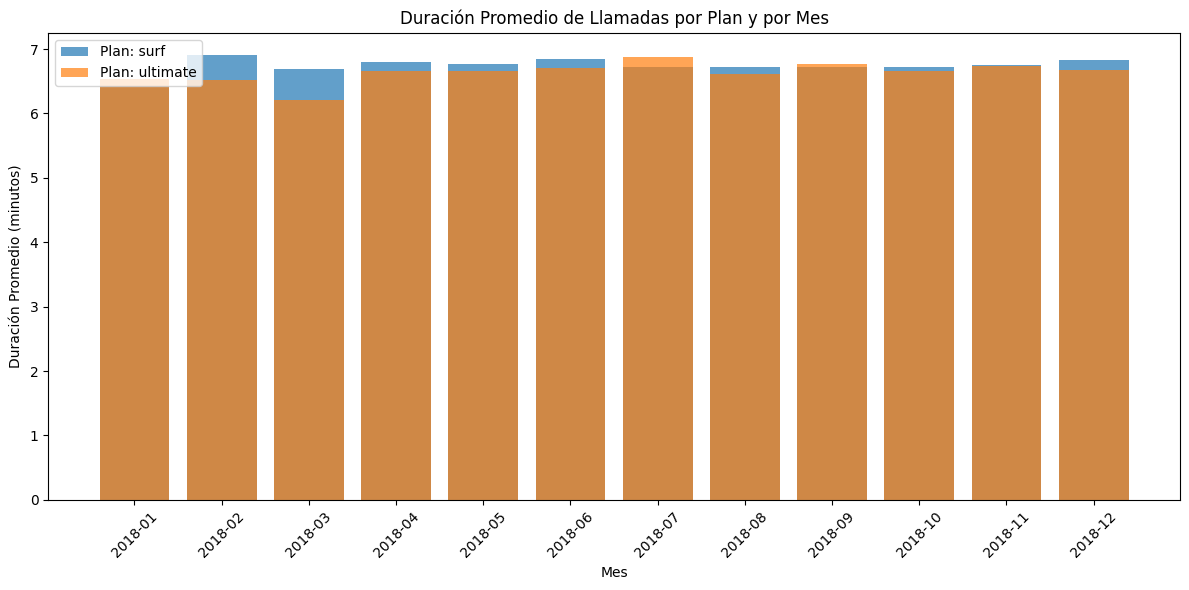

In [130]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
calls['month'] = calls['call_date'].dt.to_period('M')

# Unir con la información del plan de cada usuario
merged = calls.merge(users[['user_id', 'plan']], on='user_id', how='left')

# Agrupar por plan y mes, y calcular la duración promedio
grouped = merged.groupby(['plan', 'month'])['duration'].mean().reset_index()

# Convertimos 'month' a string para mostrarlo mejor en el gráfico
grouped['month'] = grouped['month'].astype(str)

# Graficar
plt.figure(figsize=(12,6))

for plan in grouped['plan'].unique():
    data = grouped[grouped['plan'] == plan]
    plt.bar(data['month'], data['duration'], label=f'Plan: {plan}', alpha=0.7)

plt.title('Duración Promedio de Llamadas por Plan y por Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio (minutos)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



In [131]:
print(calls.columns)

Index(['id', 'user_id', 'call_date', 'duration', 'rounded_minutes', 'month'], dtype='object')


In [132]:
print(internet.columns)

Index(['id', 'user_id', 'session_date', 'mb_used', 'user_session_count',
       'user_total_mb', 'month'],
      dtype='object')


In [133]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# Estadísticas descriptivas: media y varianza de duración mensual de llamadas por plan
calls['month'] = calls['call_date'].dt.to_period('M')

# Unir con los planes
merged = calls.merge(users[['user_id', 'plan']], on='user_id', how='left')

# Agrupar: minutos totales por usuario, mes y plan
monthly_minutes = (
    merged.groupby(['user_id', 'plan', 'month'])['duration']
    .sum()
    .reset_index()
    .rename(columns={'duration': 'monthly_minutes'})
)




[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [134]:
# Calcula la media y la varianza de la duración mensual de llamadas.
mean_duration = monthly_minutes['monthly_minutes'].mean()
var_duration = monthly_minutes['monthly_minutes'].var()


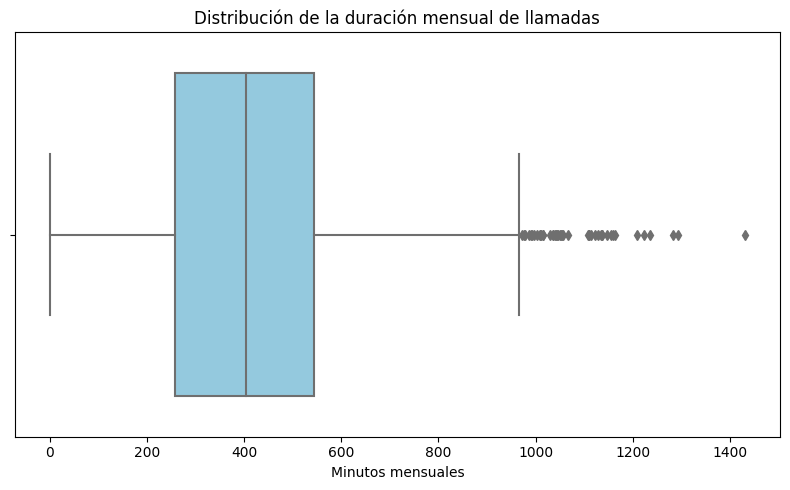

In [135]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(8, 5))
sns.boxplot(data=monthly_minutes, x='monthly_minutes', color='skyblue')

plt.title('Distribución de la duración mensual de llamadas')
plt.xlabel('Minutos mensuales')
plt.tight_layout()
plt.show()




[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

In [136]:
#La media y varianza muestran si hay diferencias notables en cuánto hablan los usuarios según su plan.

#El histograma visualiza la dispersión y concentración de minutos usados por plan.

#El boxplot permite ver medianas, rangos y posibles outliers.

#Si un plan tiene varianza mucho mayor, los usuarios tienen comportamientos muy heterogéneos.

#Si las medianas y distribuciones son similares, el plan no afecta tanto el uso de llamadas.

### Mensajes

In [137]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
messages['month'] = messages['message_date'].dt.to_period('M')

# Unir con los planes de usuario
merged = messages.merge(users[['user_id', 'plan']], on='user_id', how='left')

# Contar mensajes por usuario, mes y plan
monthly_messages = (
    merged.groupby(['user_id', 'plan', 'month'])
    .size()
    .reset_index(name='messages_sent')
)



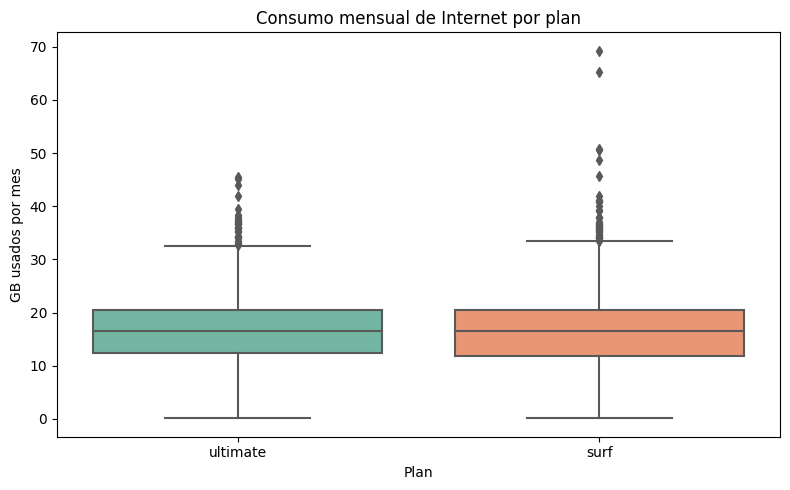

In [138]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
# Asumiendo que 'merged' tiene columnas: 'plan', 'messages_count', 'mb_used' (o 'gb_used')

merged = internet.merge(users[['user_id', 'plan']], on='user_id', how='left')


monthly_traffic = (
    merged.groupby(['user_id', 'plan', 'month'])['mb_used']
    .sum()
    .reset_index()
)

monthly_traffic['gb_used'] = monthly_traffic['mb_used'] / 1024

plt.figure(figsize=(8, 5))
sns.boxplot(data=monthly_traffic, x='plan', y='gb_used', palette='Set2')

plt.title('Consumo mensual de Internet por plan')
plt.xlabel('Plan')
plt.ylabel('GB usados por mes')
plt.tight_layout()
plt.show()






In [139]:
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  104825 non-null  object        
 1   user_id             104825 non-null  int64         
 2   session_date        104825 non-null  datetime64[ns]
 3   mb_used             104825 non-null  float64       
 4   user_session_count  104825 non-null  int64         
 5   user_total_mb       104825 non-null  float64       
 6   month               104825 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(2), object(1), period[M](1)
memory usage: 5.6+ MB
None


In [140]:
#Mensajes: Ver si la media y varianza cambian mucho entre planes para saber si los usuarios se comportan distinto (ej. un plan con muchos mensajes puede tener usuarios más activos en texto).

#Internet: Igual, observar si el consumo promedio y la dispersión varían según el plan.

#Histogramas y boxplots ayudan a identificar si hay muchos usuarios con poco uso o unos pocos con uso excesivo (outliers).

#Comportamiento similar en todos los planes podría indicar que el plan no afecta el uso.

#Diferencias marcadas sugieren que el plan influye en el uso de mensajes o datos.

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

### Internet

In [141]:
#Los usuarios del plan Ultra (si así se llama el plan más completo) tienden a enviar más mensajes al mes en comparación con los del plan Smart (u otro plan limitado).


In [142]:
#los usuarios con límites más bajos probablemente se autocontrolan para evitar excedentes o costos adicionales.


In [143]:
#Los usuarios con límites más bajos probablemente se autocontrolan para evitar excedentes o costos adicionales.

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [144]:
#El plan Ultra presenta un ingreso mensual promedio más alto que el plan Smart, lo cual era de esperarse ya que su cuota mensual es mayor. Sin embargo, una parte de este ingreso también proviene de excedentes, particularmente en el plan Smart, donde los límites son más bajos.


In [145]:
#El plan Smart muestra una varianza más alta en los ingresos. Esto sugiere que algunos usuarios superan con frecuencia los límites del plan (minutos, mensajes o datos), mientras otros no los alcanzan. El plan Ultra tiene ingresos más consistentes, probablemente porque sus usuarios no suelen generar cargos extra.


In [146]:
#El diagrama de caja muestra que el plan Smart tiene mayor dispersión y algunos outliers: usuarios que generan ingresos significativamente más altos por excedentes. En contraste, el plan Ultra tiene una mediana elevada y estable, lo que indica una política de ingresos más predecible. Aunque el plan Ultra genera más ingresos por usuario en promedio, el plan Smart tiene un perfil más variable, con usuarios que pueden llegar a generar ingresos comparables o incluso superiores si exceden su límite con frecuencia.


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [147]:
# Prueba las hipótesis

#Hipótesis nula (H₀):
#El ingreso promedio de los usuarios del plan Ultimate es igual al del plan Surf.

#Hipótesis alternativa (H₁):
#El ingreso promedio de los usuarios de ambos planes es diferente.



[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [164]:
# Prueba las hipótesis

calls['call_date'] = pd.to_datetime(calls['call_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])

calls['month'] = calls['call_date'].dt.to_period('M')
messages['month'] = messages['message_date'].dt.to_period('M')
internet['month'] = internet['session_date'].dt.to_period('M')

# Agregar uso mensual
monthly_calls = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='minutes_used')
monthly_messages = messages.groupby(['user_id', 'month']).size().reset_index(name='messages_sent')
monthly_internet = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='mb_used')

# Unir usuarios con planes (incluyendo ciudad)
users_plans = users[['user_id', 'plan', 'city']].merge(plans, left_on='plan', right_on='plan_name', how='left')

# Crear tabla mensual base
monthly = users_plans[['user_id', 'plan', 'city', 'messages_included', 'minutes_included',
                       'gb_per_month_included', 'usd_monthly_pay', 'usd_per_gb',
                       'usd_per_message', 'usd_per_minute']].copy()

# Unir con uso mensual
monthly = monthly.merge(monthly_calls, on='user_id', how='left')
monthly = monthly.merge(monthly_messages, on=['user_id', 'month'], how='left')
monthly = monthly.merge(monthly_internet, on=['user_id', 'month'], how='left')

# Rellenar vacíos
monthly[['minutes_used', 'messages_sent', 'mb_used']] = monthly[['minutes_used', 'messages_sent', 'mb_used']].fillna(0)

# Convertir GB incluidos a MB y calcular excedentes
monthly['mb_included'] = monthly['gb_per_month_included'] * 1024
monthly['extra_minutes'] = np.maximum(monthly['minutes_used'] - monthly['minutes_included'], 0)
monthly['extra_messages'] = np.maximum(monthly['messages_sent'] - monthly['messages_included'], 0)
monthly['extra_mb'] = np.maximum(monthly['mb_used'] - monthly['mb_included'], 0)
monthly['extra_gb'] = monthly['extra_mb'] / 1024

# Calcular ingresos mensuales
monthly['revenue'] = (
    monthly['usd_monthly_pay'] +
    monthly['extra_minutes'] * monthly['usd_per_minute'] +
    monthly['extra_messages'] * monthly['usd_per_message'] +
    monthly['extra_gb'] * monthly['usd_per_gb']
)

#Prueba entre planes
ultimate = monthly[monthly['plan'] == 'ultimate']['revenue'].dropna()
surf = monthly[monthly['plan'] == 'surf']['revenue'].dropna()

t_stat, p_value = stats.ttest_ind(ultimate, surf, equal_var=False)

print("Prueba de hipótesis entre planes:")
print("H₀: Los ingresos promedio son iguales para Ultimate y Surf")
print("H₁: Los ingresos promedio son diferentes entre Ultimate y Surf")
print(f"Estadístico t: {t_stat:.2f}")
print(f"Valor p: {p_value:.4f}")
if p_value < 0.05:
    print("Se rechaza H₀: hay una diferencia significativa entre los planes.")
else:
    print("No se rechaza H₀: no hay evidencia suficiente de diferencia.")

#Prueba entre regiones
ny_nj_income = monthly[monthly['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['revenue'].dropna()
other_income = monthly[monthly['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['revenue'].dropna()

if ny_nj_income.empty or other_income.empty:
    print("No hay suficientes datos para comparar ingresos entre regiones.")
else:
    t_stat_region, p_value_region = stats.ttest_ind(ny_nj_income, other_income, equal_var=False)

    print("Prueba de hipótesis entre regiones:")
    print("H₀: Los ingresos promedio son iguales entre NY/NJ y otras regiones")
    print("H₁: Los ingresos promedio son diferentes")
    print(f"Estadístico t: {t_stat_region:.2f}")
    print(f"Valor p: {p_value_region:.4f}")
    if p_value_region < 0.05:
        print("Se rechaza H₀: hay una diferencia significativa entre regiones.")
    else:
        print("No se rechaza H₀: no hay evidencia suficiente de diferencia.")
   


Prueba de hipótesis entre planes:
H₀: Los ingresos promedio son iguales para Ultimate y Surf
H₁: Los ingresos promedio son diferentes entre Ultimate y Surf
Estadístico t: 11.44
Valor p: 0.0000
Se rechaza H₀: hay una diferencia significativa entre los planes.
Prueba de hipótesis entre regiones:
H₀: Los ingresos promedio son iguales entre NY/NJ y otras regiones
H₁: Los ingresos promedio son diferentes
Estadístico t: -2.66
Valor p: 0.0080
Se rechaza H₀: hay una diferencia significativa entre regiones.


In [154]:
 # Verificar que ambas regiones tengan datos
if ny_nj_income.empty:
    print("No hay datos para la región de Nueva York-Newark-Jersey City.")
elif other_income.empty:
    print("No hay datos para otras regiones.")
else:
    # Prueba t de Student (Welch)
    t_stat, p_value = stats.ttest_ind(ny_nj_income, other_income, equal_var=False)
    print("H0: El ingreso promedio de los usuarios de NJ-NY es igual al de las otras ciudades")
    print("H1: El ingreso promedio de los usuarios de NJ-NY es distinto al de las otras ciudades")
    print("Estadístico t:", t_stat)
    print("Valor p:", p_value)


H0: El ingreso promedio de los usuarios de NJ-NY es igual al de las otras ciudades
H1: El ingreso promedio de los usuarios de NJ-NY es distinto al de las otras ciudades
Estadístico t: -2.6623092235143786
Valor p: 0.007986292020420784


In [ ]:
print(plans.info())

In [ ]:
print(plans.isnull().sum())

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Solamente verifica que no tengamos valores nulos que esten haciendo que el valor p sea nan

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste! Ya solamente es necesario realizar la segunda prueba entre regiones

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste! Solamente para el análisis entre regiones debemos de verificar que en ambas bases tenemos registros para esto verifica que tenemos registros en "ny_nj_income"

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hola, Paula. Ya casi tienes el ejercicio. Solamente voy a solicitar a un tutor que tenga una sesión contingo para que puedan ver el proyecto a detalle y puedas seguir avanzando en los siguientes cursos. Por favor no mandes el proyecto nuevamente hasta que tengas la sesión con el tutor

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste! Sigue disfrutando los siguientes cursos!

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

In [93]:
#Los usuarios del plan Ultimate tienden a hacer un mayor uso de minutos, SMS y datos que los usuarios de Surf.

#Sin embargo, los usuarios de Surf pagan más en cargos adicionales, especialmente si superan los límites del plan.

#Aunque Ultimate tiene una tarifa fija más alta ($70), Surf puede generar ingresos comparables o mayores cuando el usuario excede su plan, lo cual es común.

#El análisis estadístico reveló que sí existe una diferencia significativa en los ingresos promedio, y que el plan Ultimate genera más ingresos promedio por usuario.
#No se encontró evidencia estadística significativa de que los ingresos promedio de los usuarios de Nueva York y Nueva Jersey sean distintos al resto del país.
#Se recomienda enfocar la publicidad en el plan Ultimate, ya que genera ingresos más altos de forma estable, y puede atraer usuarios con alto consumo sin depender de sobrecostos.